# Praktikum 2

## Import Library

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

## Membuat Kembali Fungsi Plotting

In [2]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Buat Data Dummy Non-Linear

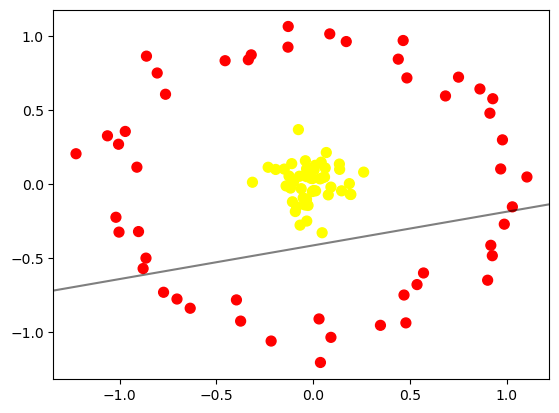

In [3]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Mengubah plot visualisasi diubah menjadi 3D

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# Hitung jarak radial dari origin sebagai fitur tambahan (dimensi ke-3)
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.76232332,  0.60557818],
       [-1.22487808,  0.20393926],
       [-0.03240046, -0.25042024],
       [-0.97030575,  0.35450763],
       [ 0.01118833,  0.12594264],
       [ 0.08646701,  1.01321558],
       [-0.05085026, -0.09424928],
       [-0.87812813, -0.57108714],
       [ 0.4701585 , -0.74998023],
       [-0.01065518,  0.0379951 ],
       [-0.12943834,  0.9236434 ],
       [-0.11010676,  0.13714152],
       [ 0.26166901,  0.07986073],
       [-0.86331742, -0.50079626],
       [ 0.06292999,  0.10783789],
       [-0.86082776,  0.86285226],
       [ 0.68454069,  0.59415418],
       [ 0.86255191,  0.64123825],
       [ 0.04721108,  0.04096624],
       [-1.01857355, -0.22494099],
       [ 0.75186367,  0.72105636],
       [ 1.0301606 , -0.15461383],
       [-0.00372748, -0.05131692],
       [ 0.00582974,  0.09512007],
       [ 0.98845234, -0.27168724],
       [-0.06692643, -0.27821585],
       [ 0.01320483, -0.04658836],
       [

## Fitting Model

In [6]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Plot hasil decision boundaries dari kernel RBF

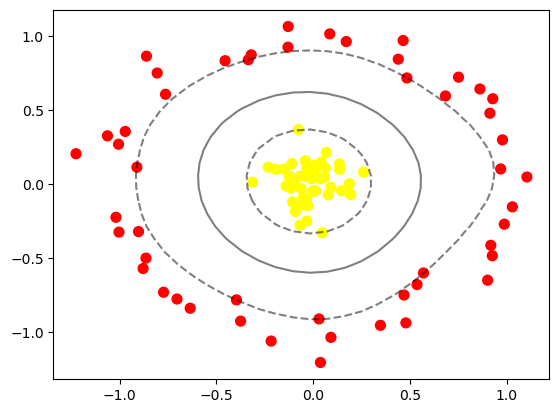

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')